In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

plt.style.use('seaborn')
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


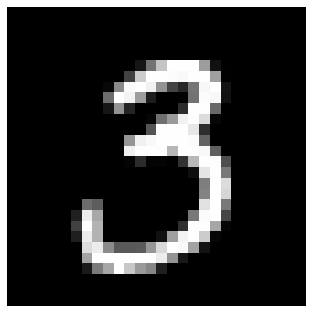

In [4]:
plt.axis('off')
plt.imshow(X_test[90], cmap="gray")

In [6]:
print(y_test[90])
X = X_test.reshape(-1, 28*28)
y = y_test
print(X.shape)

3
(10000, 784)


In [7]:
# Step 1 - Preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ = sc.fit_transform(X)
print(X_.shape)

(10000, 784)


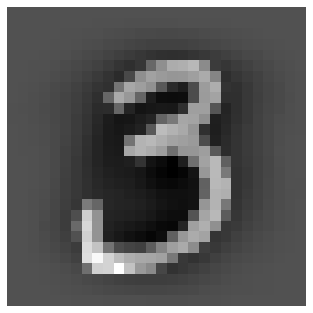

In [9]:
plt.axis('off')
plt.imshow(X_[90].reshape(28,28) , cmap="gray")

## Sklearn PCA

In [1]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z_pca = pca.fit_transform(X_)
print(Z_pca.shape,Z_pca)

#### converted to 2 dimensions i.e 2 principal components
- explained_variance_ represents variance wrt to original data.
- PC1 is 41 % of the original data and PC2 is 28 % of original data 
- so after PCA total 68 % variance is retained but 32 % data is lost.

In [26]:
pca.explained_variance_

array([41.39893397, 28.35105756])

## Custom PCA

In [12]:
import numpy as np
# Step 2 - Computer Covar matrix
covar = np.dot(X_.T, X_)
# Step - 3 Computer eigen vectors using SVD
from numpy.linalg import svd
U, S, V = svd(covar)
Ured = U[:, :2]
print(U.shape,Ured.shape)
# Step 4 - Project of Data on New axis(Components)
Z = np.dot(X_, Ured)
print(Z.shape)
print(Z)

(784, 784) (784, 2)
(10000, 2)
[[  5.45831116  -6.41400668]
 [ -2.80443233   8.02885014]
 [  7.41124146   3.86404387]
 ...
 [  5.00435204  -1.15364641]
 [  1.42085442   4.42308066]
 [-13.14268302   4.26280299]]


## Visualize Dataset

In [13]:
import pandas as pd

In [14]:
new_dataset = np.hstack((Z, y.reshape(-1,1)))

In [15]:
dataframe = pd.DataFrame(new_dataset , columns=["PC1", "PC2", "label"])

In [16]:
dataframe.head()

,PC1,PC2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x1080 with 0 Axes>

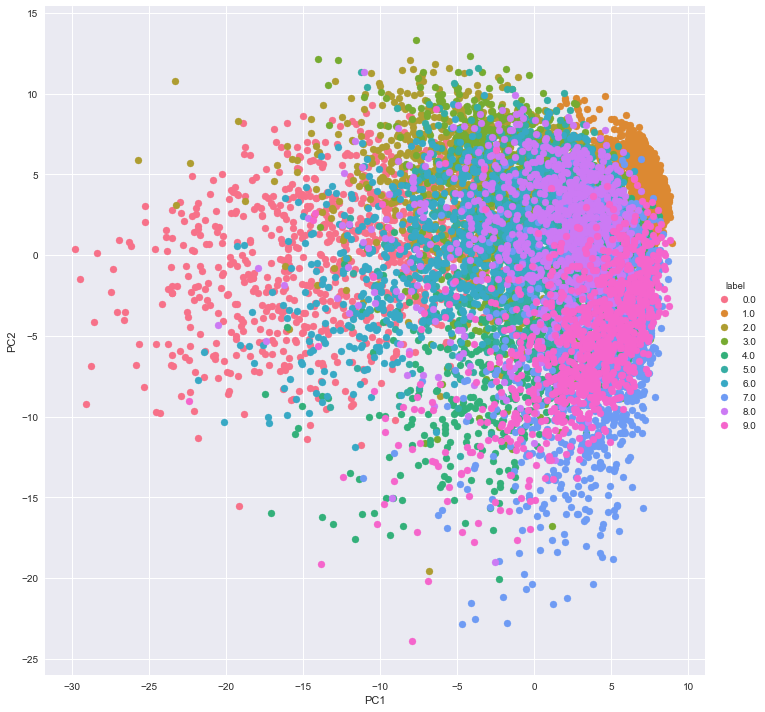

In [17]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe, hue="label", height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

# PCA with 784 Features

In [18]:
pca = PCA()
Z_pca= pca.fit_transform(X_)
cum_var_exaplined = np.cumsum(pca.explained_variance_ratio_)

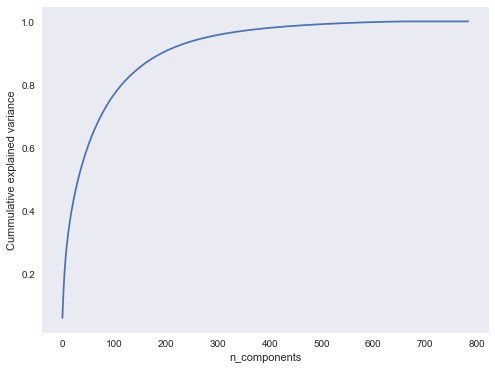

In [19]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_exaplined)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative explained variance")
plt.show()

### By drawing a curve like this we can get an idea of what should be the no of components so as to not loose much information. example- in the above curve we can see on reducing 784 features to 300 90 % variance is still retained so we can apply PCA with n_components=300